# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Shanella Christina]
- **Email:** [nenelchristina@gmail.com]
- **ID Dicoding:** [shanella]

## Menentukan Pertanyaan Bisnis

- Seperti apa tren penyewaan sepeda dalam beberapa bulan terakhir?
- Di musim apa penyewaan sepeda mencapai angka tertinggi dan terendah?
- Bagaimana pengaruh kondisi cuaca terhadap frekuensi penggunaan sepeda?
- Seberapa berbeda tingkat penggunaan sepeda oleh pelanggan pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Import csv file 
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [3]:
# Melihat sekilas isi file
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
# Melihat sekilas isi file
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**  
- Kedua data csv day.csv dan hour.csv berhasil di import

### Assessing Data

In [5]:
# Melihat informasi ringkas tentang dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Melihat informasi ringkas tentang dataset hour_Df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Check missing/null value day_df
print("Missing values in day_df:")
print(day_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Check missing/null value day_df
print("\nMissng values in hour_df:")
print(hour_df.isnull().sum())


Missng values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# stat. deskriptif dalam dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# stat. deskriptif dalam dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Penyesuaian tipe data setelah .info()
# Convert date data ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [12]:
# Ubah semua data kategorikal menjadi tipe data kategorikal
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in categorical_columns:
  day_df[column] = day_df[column].astype('category')
  hour_df[column] = hour_df[column].astype('category')

In [13]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [14]:
# Check duplicate data
print("Duplicate in day_df: ", day_df.duplicated().sum())
print("Duplicate in hour_df: ", hour_df.duplicated().sum())

Duplicate in day_df:  0
Duplicate in hour_df:  0


In [15]:
# Ekstrak waktu ke dalam kolom baru untuk mempermudah analisis data berbasis waktu
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day

In [16]:
# Mengubah nilai numerik di kolom season (1, 2, 3, 4) ke (Spring, Summer, dll.)
season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_name)
hour_df['season_name'] = hour_df['season'].map(season_name)

In [17]:
# Membuat kolom is_weekend untuk mempermudah analisis
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

**Insight:**
- Kedua file CSV tidak ada missing value
- Setelah memeriksa describe(), tidak ditemukan data yang aneh atau anomaly.
- Data terlihat benar setelah diperiksa menggunakan info().
- Membuat mapping untuk musim dan hari dalam seminggu agar dapat mengetahui season_name dan apakah itu weekend atau bukan
- Tidak ada data duplikat dalam file.

### Cleaning Data

In [18]:
# data good to be use

**Insight:**
- Tidak ada value yang duplicate, missing, atau inaccurate di dalam dataset, jadi tidak ada yang perlu dihapus atau diperbaiki. Kode untuk memeriksa telah disertakan di bagian Assessing data, Oleh sebab itu tidak melakukan apa-apa dalam cleaning data

## Exploratory Data Analysis (EDA)

### Explore day_df

In [19]:
# melihat data secara keseluruhan lagi after assessing
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,...,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,6.519836,15.738714,NaN,0.285910
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,...,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,1.000000,1.000000,NaN,0.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,...,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,4.000000,8.000000,NaN,0.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,...,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,7.000000,16.000000,NaN,0.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,...,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,10.000000,23.000000,NaN,1.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,...,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,12.000000,31.000000,NaN,1.000000


In [20]:
# untuk pertanyaan pertama, melihat transaksi bulanan jumlah penyewaan sepeda
monthly_transactions = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

print(monthly_transactions)

    year  month     cnt
0   2011      1   38189
1   2011      2   48215
2   2011      3   64045
3   2011      4   94870
4   2011      5  135821
5   2011      6  143512
6   2011      7  141341
7   2011      8  136691
8   2011      9  127418
9   2011     10  123511
10  2011     11  102167
11  2011     12   87323
12  2012      1   96744
13  2012      2  103137
14  2012      3  164875
15  2012      4  174224
16  2012      5  195865
17  2012      6  202830
18  2012      7  203607
19  2012      8  214503
20  2012      9  218573
21  2012     10  198841
22  2012     11  152664
23  2012     12  123713


In [21]:
# Cek transaksi penyewaan sepeda berdasarkan musim (season_name) 

day_df.groupby(by="season_name").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\310425677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season_name").agg({


instant   cnt                                         
            nunique   max   min          std         mean      sum
season_name                                                       
Spring          181  7836   431  1399.942119  2604.132597   471348
Summer          184  8362   795  1695.977235  4992.331522   918589
Fall            188  8714  1115  1459.800381  5644.303191  1061129
Winter          178  8555    22  1699.615261  4728.162921   841613

In [22]:
# Cek transaksi penyewaan sepeda berdasarkan cuaca (weathersit) 
day_df.groupby(by="weathersit").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\2936828212.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weathersit").agg({


instant   cnt                                        
           nunique   max  min          std         mean      sum
weathersit                                                      
1              463  8714  431  1879.483989  4876.786177  2257952
2              247  8362  605  1809.109918  4035.862348   996858
3               21  4639   22  1240.284449  1803.285714    37869

In [23]:
# Cek transaksi penyewaan sepeda berdasarkan hari kerja (workingday) 
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\2920892619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [24]:
# Cek transaksi penyewaan sepeda berdasarkan hari di akhir pekan (is_weekend) 
day_df.groupby(by="is_weekend").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

instant   cnt                                        
           nunique   max  min          std         mean      sum
is_weekend                                                      
0              522  8227   22  1894.928336  4458.011494  2327082
1              209  8714  627  2039.080571  4620.081340   965597

### Explore hour_df

In [25]:
# melihat data secara keseluruhan
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,3.0,1.0,5.0,NaN,0.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,...,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,6.537775,15.683411,NaN,0.287646
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,NaN,0.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,...,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,NaN,0.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,...,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,NaN,0.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,23.000000,NaN,1.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,...,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,31.000000,NaN,1.000000


In [26]:
# untuk pertanyaan pertama, melihat transaksi bulanan jumlah penyewaan sepeda
monthly_transactions = hour_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

print(monthly_transactions)

    year  month     cnt
0   2011      1   38189
1   2011      2   48215
2   2011      3   64045
3   2011      4   94870
4   2011      5  135821
5   2011      6  143512
6   2011      7  141341
7   2011      8  136691
8   2011      9  127418
9   2011     10  123511
10  2011     11  102167
11  2011     12   87323
12  2012      1   96744
13  2012      2  103137
14  2012      3  164875
15  2012      4  174224
16  2012      5  195865
17  2012      6  202830
18  2012      7  203607
19  2012      8  214503
20  2012      9  218573
21  2012     10  198841
22  2012     11  152664
23  2012     12  123713


In [27]:
# Cek transaksi penyewaan sepeda berdasarkan musim (season_name) 

hour_df.groupby(by="season_name").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\1364092954.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season_name").agg({


instant  cnt                                     
            nunique  max min         std        mean      sum
season_name                                                  
Spring         4242  801   1  119.224010  111.114569   471348
Summer         4409  957   1  188.362473  208.344069   918589
Fall           4496  977   1  197.711630  236.016237  1061129
Winter         4232  967   1  182.967972  198.868856   841613

In [28]:
# Cek transaksi penyewaan sepeda berdasarkan cuaca (weathersit) 
hour_df.groupby(by="weathersit").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\3937841368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weathersit").agg({


instant  cnt                                     
           nunique  max min         std        mean      sum
weathersit                                                  
1            11413  977   1  189.487773  204.869272  2338173
2             4544  957   1  165.431589  175.165493   795952
3             1419  891   1  133.781045  111.579281   158331
4                3  164  23   77.925178   74.333333      223

In [29]:
# Cek transaksi penyewaan sepeda berdasarkan hari kerja (workingday) 
hour_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\1526978422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='workingday').agg({


cnt                
            max min        mean
workingday                     
0           783   1  181.405332
1           977   1  193.207754

In [30]:
# Cek transaksi penyewaan sepeda berdasarkan hari di akhir pekan (is_weekend) 
day_df.groupby(by="is_weekend").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

instant   cnt                                        
           nunique   max  min          std         mean      sum
is_weekend                                                      
0              522  8227   22  1894.928336  4458.011494  2327082
1              209  8714  627  2039.080571  4620.081340   965597

In [31]:
# Menghitung rata-rata transaksi untuk weekday dan weekend
average_transactions = day_df.groupby('is_weekend')['cnt'].mean().reset_index()

average_transactions['is_weekend'] = average_transactions['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
print(average_transactions)


  is_weekend          cnt
0    Weekday  4458.011494
1    Weekend  4620.081340


**Insight:**
- Bisa dilihat pada output setiap cell yang bisa membantu analisis data lebih lanjut

## Visualization & Explanatory Analysis

### Pertanyaan 1:

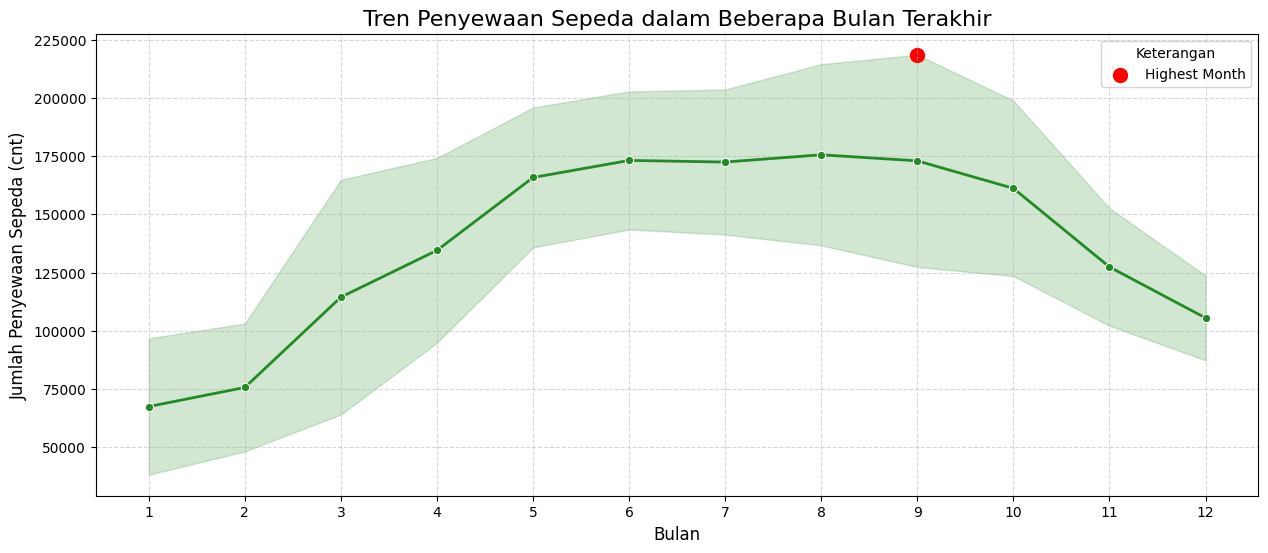

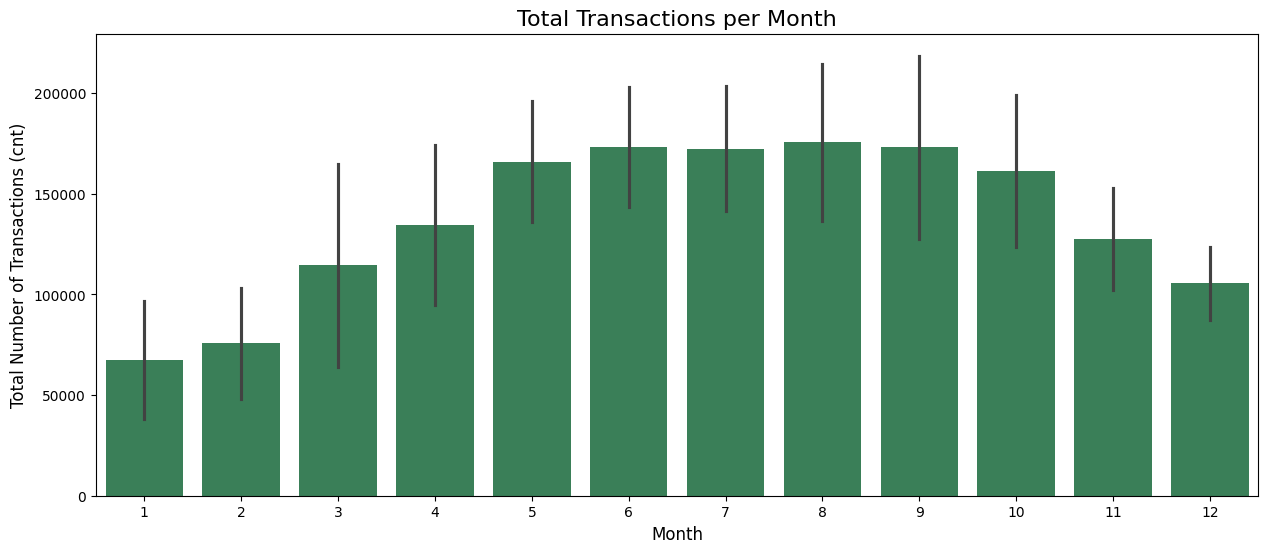

In [32]:
# tren penyewaan sepeda dalam beberapa bulan terakhir
plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='cnt', data=monthly_transactions, marker='o', color='forestgreen', linewidth=2)

highest_month_index = monthly_transactions['cnt'].idxmax()
highest_month = monthly_transactions.iloc[highest_month_index]
plt.scatter(highest_month['month'], highest_month['cnt'], color='red', s=100, label='Highest Month')

plt.title('Tren Penyewaan Sepeda dalam Beberapa Bulan Terakhir', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.xticks(range(1, 13), fontsize=10)  
plt.yticks(fontsize=10)
plt.legend(title='Keterangan', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# bar plot untuk lebih to the point
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='cnt', data=monthly_transactions, color='seagreen')

plt.title('Total Transactions per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Number of Transactions (cnt)', fontsize=12)
plt.show()


### Pertanyaan 2:

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\2312842431.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_transactions = day_df.groupby('season_name')['cnt'].sum().reset_index()


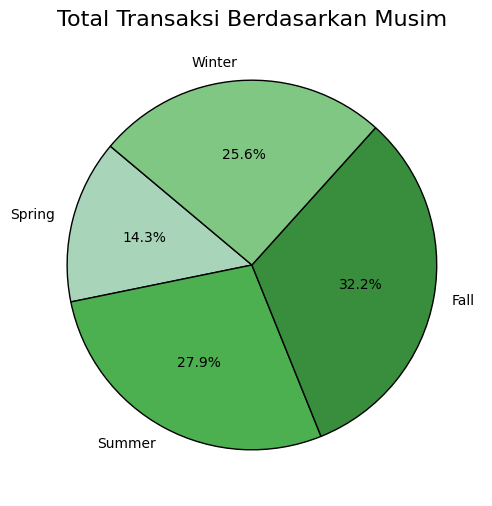

In [33]:
# Di musim apa penyewaan sepeda mencapai angka tertinggi dan terendah

seasonal_transactions = day_df.groupby('season_name')['cnt'].sum().reset_index()

colors = ['#A8D5BA', '#4CAF50', '#388E3C', '#81C784']

plt.figure(figsize=(6, 6))
plt.pie(
    seasonal_transactions['cnt'],  
    labels=seasonal_transactions['season_name'],  
    colors=colors, 
    autopct='%1.1f%%',  
    startangle=140,  
    wedgeprops={'edgecolor': 'black'}  
)

plt.title('Total Transaksi Berdasarkan Musim', fontsize=16)
plt.show()


### Pertanyaan 3

C:\Users\shane\AppData\Local\Temp\ipykernel_33980\456827827.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_transactions = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
C:\Users\shane\AppData\Local\Temp\ipykernel_33980\456827827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_transactions, palette=colors)


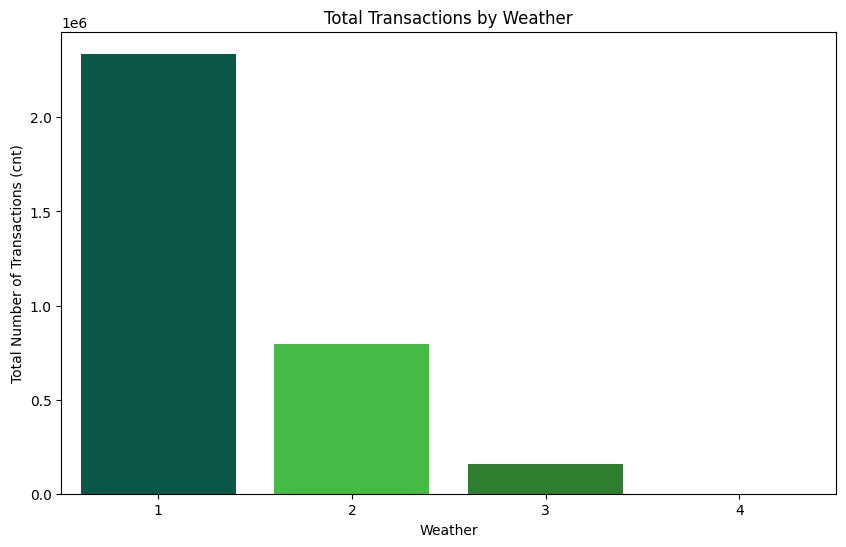

In [34]:
# Pengaruh kondisi cuaca terhadap frekuensi penggunaan sepeda

weather_transactions = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

highest_weather_index = weather_transactions['cnt'].idxmax()

colors = ['#66CDAA', '#32CD32', '#228B22', '#006400']
colors[highest_weather_index] = '#006450'

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_transactions, palette=colors)
plt.title('Total Transactions by Weather')
plt.xlabel('Weather')
plt.ylabel('Total Number of Transactions (cnt)')
plt.show()



### Pertanyaan 4

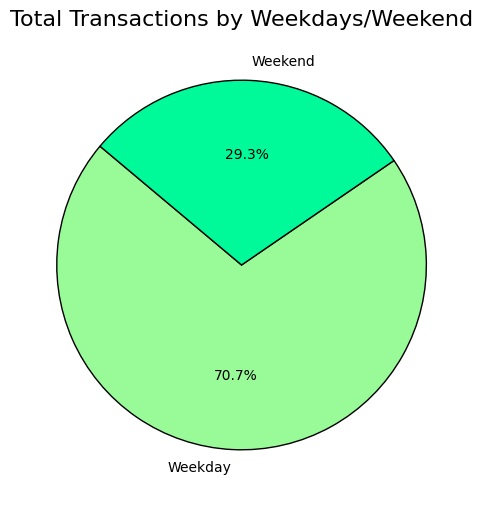

In [35]:
# perbedaan tingkat penggunaan sepeda oleh pelanggan pada hari kerja dibandingkan dengan akhir pekan
weekend_transactions = day_df.groupby('is_weekend')['cnt'].sum().reset_index()

colors_weekend = ['#98FB98', '#00FA9A']  # Palet hijau yang lebih terang dan enak dipandang

plt.figure(figsize=(6, 6))
plt.pie(
    weekend_transactions['cnt'],
    labels=weekend_transactions['is_weekend'].map({0: 'Weekday', 1: 'Weekend'}),  # Label untuk 0 dan 1
    colors=colors_weekend,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Total Transactions by Weekdays/Weekend', fontsize=16)
plt.show()


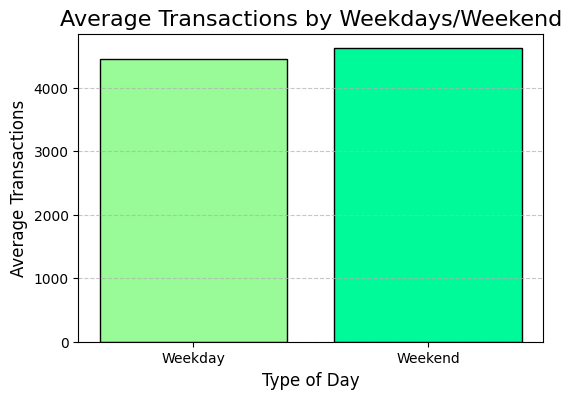

In [36]:
# Visualisasi rata-rata transaksi untuk weekday dan weekend
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(
    average_transactions['is_weekend'],
    average_transactions['cnt'],
    color=['#98FB98', '#00FA9A'],  # Warna hijau
    edgecolor='black'
)
plt.title('Average Transactions by Weekdays/Weekend', fontsize=16)
plt.xlabel('Type of Day', fontsize=12)
plt.ylabel('Average Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**  

Dari visualisasi yang sudah dilakukan untuk setiap pertanyaan, dapat dilihat bahwa:
- Tren penyewaan sepeda mencapai titik tertinggi di bulan ke 9
- Pada season "Fall" Nampak bahwa total transaksi penyewaan sepeda paling banyak
- Pada weather 1: Clear, Few clouds, Partly cloudy, Partly cloudy, Nampak bahwa frekuensi penggunaan sepeda paling banyak
- Tingkat penggunaan sepeda oleh pelanggan lebih banyak di hari kerja (weekday)

## Conclusion

**Pertanyaan 1: Seperti apa tren penyewaan sepeda dalam beberapa bulan terakhir?**  
- Dari data transaksi bulanan, terlihat bahwa jumlah transaksi berubah-ubah setiap bulan. Karena fluktuasi ini, kita tidak dapat menyimpulkan tren spesifik dari data transaksi bulanan.   

**Pertanyaan 2: Di musim apa penyewaan sepeda mencapai angka tertinggi dan terendah?**  
- Berdasarkan data transaksi musiman, jumlah transaksi tertinggi terjadi pada musim gugur (fall), diikuti oleh musim panas (summer), musim dingin(winter), dan terakhir musim semi(spring). 
**Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap frekuensi penggunaan sepeda?**  
- Dari data transaksi berdasarkan kondisi cuaca, diketahui bahwa jumlah transaksi terbanyak terjadi ketika cuaca berada pada kategori 1. Semakin baik cuaca, semakin banyak transaksi yang terjadi. Hal ini menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap frekuensi penggunaan sepeda. Bahkan kategori 4 tidak memiliki data karena mungkin tidak ada orang yang bersepeda di cuaca heavy rain, thunderstorm, dll

**Pertanyaan 4: Seberapa berbeda tingkat penggunaan sepeda oleh pelanggan pada hari kerja dibandingkan dengan akhir pekan?**  
- Berdasarkan data transaksi harian, jumlah total transaksi lebih besar pada weekday dibandingkan weekend. Namun, jika dilihat dari rata-rata, transaksi pada weekend lebih tinggi dibandingkan weekday. Dengan demikian, dapat diasumsikan bahwa meskipun total transaksi lebih banyak pada weekday, intensitas penggunaan sepeda oleh pelanggan lebih tinggi pada weekend.